<a href="https://colab.research.google.com/github/Lazza721/UniDao/blob/main/PresentacionAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

In [3]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

#vocabulario
sentences = [['I', 'love', 'machine', 'learning'],
             ['Machine', 'learning', 'is', 'fun'],
             ['Deep', 'learning', 'is', 'interesting']]

# Entrenar el modelo Word2Vec para generar embeddings
#window = vecinos cercanos a tomar en cuenta
#sg =0: utilizamos el modelo cbow y si fuera 1 skip gram
#min_count:  nos ayuda reduciendo el ruido de palabras frecuentes

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Obtener el embedding de una palabra
word1_embedding = model.wv['Machine']
word2_embedding = model.wv['Deep']

# Calcular la similitud por similitud del coseno entre dos embeddings
similarity_score = cosine_similarity([word1_embedding], [word2_embedding])

print("Embedding de 'machine':", word1_embedding[:10])
print("Embedding de 'deep':", word2_embedding[:10])
print("Similitud de coseno entre 'machine' y 'deep':", similarity_score[0][0])


Embedding de 'machine': [-0.00872748  0.00213016 -0.00087354 -0.00931909 -0.00942814 -0.00141072
  0.00443241  0.00370407 -0.00649869 -0.00687307]
Embedding de 'deep': [-0.00824268  0.00929935 -0.00019766 -0.00196728  0.00460363 -0.00409532
  0.00274311  0.00693997  0.00606543 -0.00751079]
Similitud de coseno entre 'machine' y 'deep': 0.13149005


In [2]:
!pip install min-dalle -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.9 MB/s eta 0:00:00


In [3]:
dtype = "float32"

from IPython.display import display, update_display

import torch

from min_dalle import MinDalle

model = MinDalle(dtype=getattr(torch, dtype), device='cuda', is_mega=True, is_reusable=True)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


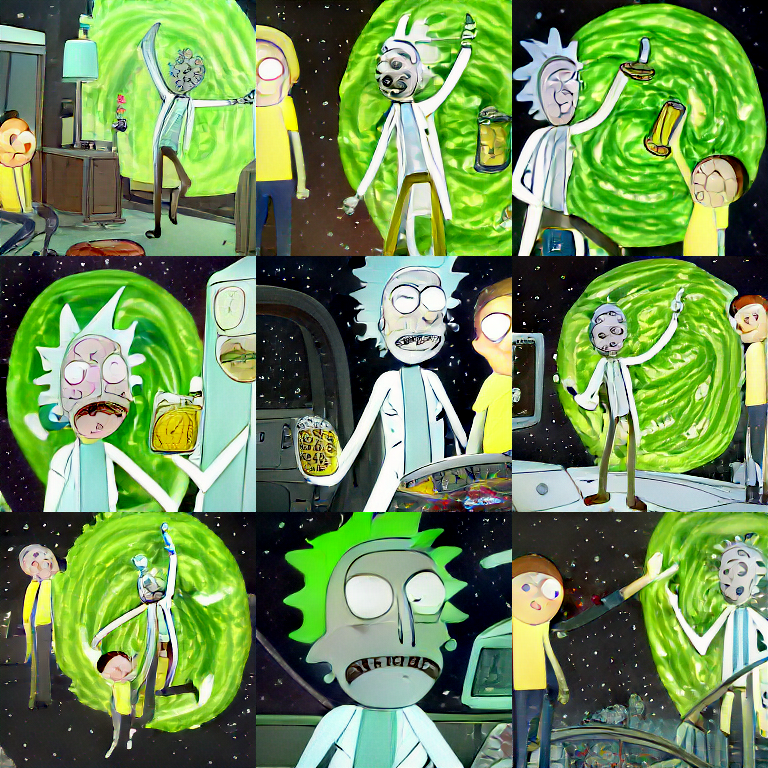

CPU times: user 52.6 s, sys: 1.15 s, total: 53.8 s
Wall time: 54.1 s


In [7]:
%%time

text = "rick and morty"

progressive_outputs = True

seamless = False

grid_size = 3

temperature = 1

supercondition_factor = 16

top_k = 128

image_stream = model.generate_image_stream(text=text, seed=-1, grid_size=grid_size, progressive_outputs=progressive_outputs, is_seamless=seamless,
                                           temperature=temperature, top_k=int(top_k), supercondition_factor=float(supercondition_factor))

is_first = True

for image in image_stream:

  display_image = display if is_first else update_display

  display_image(image, display_id=1)

is_first = False